In [23]:
import pandas as pd
import numpy as np 
import networkx as nx 
import plotly.graph_objects as go 
import matplotlib.cm as cm 
from community import community_louvain
import matplotlib.pyplot as plt

In [28]:
df_infection = pd.read_csv("/Users/manansanjaykumarshah/Downloads/Sim_Data_2023_1_9/Sim_Data_2023_1_9_reinfect_0/Infectionchain.csv",sep=';')

In [30]:
df_infection

,run,tick,stat_district,location_id,location_class,infected_person,new_infected_person
0,18,1.0,74,3,OutdoorPool,621,77367
1,18,1.0,0,55,Leisure,93973,39557
2,18,1.0,0,1,Leisure,83403,80545
3,18,1.0,0,87,Workplace,86176,66492
4,18,1.0,250,20444,Household,36120,36122
...,...,...,...,...,...,...,...
112064,98,60.0,0,51,Workplace,9233,62802
112065,98,60.0,0,44,Leisure,702,92714
112066,98,60.0,0,41,Workplace,702,27115
112067,98,60.0,125,26864,Household,48410,48409


In [31]:
df_infection['location_class'] = df_infection['location_class'].replace(['OutdoorPool','SchoolClass'],['Leisure','School'])

In [32]:
df_infection.location_class.unique()

array(['Leisure', 'Workplace', 'Household', 'School'], dtype=object)

In [33]:
df_infection

,run,tick,stat_district,location_id,location_class,infected_person,new_infected_person
0,18,1.0,74,3,Leisure,621,77367
1,18,1.0,0,55,Leisure,93973,39557
2,18,1.0,0,1,Leisure,83403,80545
3,18,1.0,0,87,Workplace,86176,66492
4,18,1.0,250,20444,Household,36120,36122
...,...,...,...,...,...,...,...
112064,98,60.0,0,51,Workplace,9233,62802
112065,98,60.0,0,44,Leisure,702,92714
112066,98,60.0,0,41,Workplace,702,27115
112067,98,60.0,125,26864,Household,48410,48409


In [34]:
# Create an empty graph
G = nx.Graph()

# Add nodes for each infected individual
for index, row in df_infection.iterrows():
   
    G.add_node(row['infected_person'], run=row['run'], location_class=row['location_class'],tick = row['tick'])

# Add edges for each spread of infection
for index, row in df_infection.iterrows():
    if not pd.isna(row['new_infected_person']):
        G.add_edge(row['infected_person'], row['new_infected_person'], run=row['run'], location_class=row['location_class'],tick = row['tick'])

In [35]:
len(G.edges)

103404

In [36]:
G.edges

EdgeView([(621, 77367), (621, 37073), (621, 78871), (93973, 39557), (93973, 93974), (93973, 28704), (93973, 43251), (93973, 82421), (93973, 30185), (93973, 94010), (93973, 93976), (93973, 57824), (93973, 93975), (93973, 71478), (83403, 80545), (83403, 81308), (83403, 15003), (86176, 66492), (36120, 36122), (36120, 36121), (36120, 74949), (36120, 78157), (36120, 76893), (76706, 76705), (76706, 9746), (90645, 90647), (90645, 30602), (90645, 90646), (66149, 66958), (66149, 66148), (85411, 85410), (85411, 61853), (85411, 8452), (85411, 100076), (85411, 85388), (85411, 33719), (85411, 85408), (85411, 26671), (85411, 85412), (85411, 89505), (85411, 102351), (85411, 85409), (85411, 85407), (85411, 2180), (85411, 84886), (49279, 49277), (49279, 49278), (49279, 49281), (55618, 55615), (55618, 55617), (55618, 55620), (55618, 40440), (55618, 55621), (93472, 93473), (93472, 82345), (93472, 19992), (93472, 53716), (93472, 42147), (93472, 6402), (93472, 44752), (93472, 11409), (93472, 48338), (93472

In [37]:
len(G.nodes)

67412

In [38]:
G.degree

DegreeView({621: 3, 93973: 11, 83403: 3, 86176: 1, 36120: 5, 76706: 2, 90645: 3, 66149: 2, 85411: 15, 49279: 3, 55618: 5, 93472: 17, 10354: 2, 10407: 2, 73665: 5, 24678: 9, 98766: 7, 85024: 3, 65880: 2, 45305: 2, 72361: 4, 77167: 9, 31506: 3, 72510: 12, 72392: 17, 85523: 5, 4544: 5, 81031: 15, 8470: 1, 18134: 2, 79561: 4, 38269: 4, 32379: 2, 82288: 18, 76082: 11, 71622: 6, 43998: 7, 81133: 11, 33799: 11, 79287: 12, 74019: 18, 79581: 1, 79943: 4, 96077: 1, 7036: 7, 14691: 6, 6524: 21, 85107: 17, 49610: 1, 77942: 1, 58659: 1, 22163: 7, 75628: 3, 39471: 2, 37144: 1, 66958: 6, 66492: 2, 85410: 14, 96074: 11, 22844: 2, 80545: 5, 72363: 6, 44313: 5, 17408: 11, 77367: 5, 13554: 4, 19992: 3, 89726: 6, 76705: 8, 8471: 2, 13389: 3, 69257: 10, 73049: 3, 67818: 4, 37073: 3, 36122: 2, 100076: 14, 81308: 2, 74865: 9, 24679: 6, 90647: 5, 68979: 5, 49301: 4, 27614: 2, 72394: 6, 85106: 4, 64397: 4, 86524: 13, 62561: 3, 74063: 6, 76081: 5, 97099: 8, 42300: 2, 93191: 19, 48511: 3, 11826: 3, 77366: 2, 837

In [10]:
# Compute the average degree of the graph
avg_degree = sum(dict(G.degree()).values())/len(G)

In [11]:
# Iterate over the nodes in the graph
for node in list(G.nodes()):
    # Compute the degree of the current node
    degree = G.degree(node)
    
    # Check if the degree is significantly higher or lower than the average degree
    if degree > avg_degree*1.5 or degree < avg_degree*0.5:
        # Remove the node from the graph
        G.remove_node(node)

In [12]:
len(G.edges)

19393

In [13]:
len(G.nodes)

22304

In [22]:
centrality = nx.degree_centrality(G)
centrality

{621: 8.967403488319957e-05,
 83403: 8.967403488319957e-05,
 76706: 0.0,
 90645: 4.4837017441599784e-05,
 66149: 0.0,
 49279: 0.00013451105232479936,
 10354: 0.0,
 10407: 8.967403488319957e-05,
 85024: 4.4837017441599784e-05,
 65880: 4.4837017441599784e-05,
 45305: 8.967403488319957e-05,
 72361: 4.4837017441599784e-05,
 31506: 4.4837017441599784e-05,
 18134: 4.4837017441599784e-05,
 79561: 4.4837017441599784e-05,
 38269: 0.00013451105232479936,
 32379: 4.4837017441599784e-05,
 79943: 0.00013451105232479936,
 75628: 4.4837017441599784e-05,
 39471: 0.0,
 22844: 4.4837017441599784e-05,
 44313: 8.967403488319957e-05,
 13554: 8.967403488319957e-05,
 19992: 0.0,
 13389: 0.0,
 73049: 4.4837017441599784e-05,
 67818: 4.4837017441599784e-05,
 37073: 8.967403488319957e-05,
 81308: 8.967403488319957e-05,
 68979: 8.967403488319957e-05,
 49301: 8.967403488319957e-05,
 27614: 4.4837017441599784e-05,
 85106: 4.4837017441599784e-05,
 64397: 0.0,
 62561: 4.4837017441599784e-05,
 76081: 8.967403488319957

In [18]:
max_centrality = max(centrality.values())
max_nodes = [node for node, centrality in centrality.items() if centrality == max_centrality]

In [20]:
max_centrality

0.00017934806976639914

In [23]:
len(max_nodes)

654

In [13]:
communities = community_louvain.best_partition(G)

In [14]:
communities

{621: 0,
 83403: 1,
 76706: 2,
 90645: 3,
 66149: 4,
 49279: 5,
 10354: 6,
 10407: 7,
 85024: 8,
 65880: 9,
 45305: 10,
 72361: 11,
 31506: 12,
 18134: 13,
 79561: 14,
 38269: 15,
 32379: 16,
 79943: 17,
 75628: 18,
 39471: 19,
 22844: 10,
 44313: 20,
 13554: 21,
 19992: 22,
 13389: 23,
 73049: 14,
 67818: 24,
 37073: 0,
 81308: 1,
 68979: 25,
 49301: 26,
 27614: 15,
 85106: 27,
 64397: 28,
 62561: 17,
 76081: 29,
 48511: 30,
 11826: 31,
 83790: 32,
 66960: 33,
 43043: 34,
 85108: 35,
 15003: 1,
 99967: 36,
 72393: 37,
 74062: 38,
 1464: 1,
 44315: 20,
 90646: 3,
 89727: 39,
 30520: 40,
 43044: 34,
 79286: 41,
 74870: 42,
 3877: 43,
 98935: 44,
 31968: 45,
 36369: 42,
 96075: 47,
 26136: 48,
 100965: 37,
 18394: 49,
 91779: 50,
 91068: 757,
 41255: 52,
 77634: 42,
 70328: 53,
 91449: 54,
 92189: 55,
 70349: 56,
 4216: 57,
 96574: 58,
 34144: 59,
 27491: 60,
 5819: 61,
 95339: 62,
 89931: 63,
 86482: 64,
 2718: 65,
 69392: 66,
 100342: 67,
 74914: 68,
 42325: 69,
 93299: 70,
 24035: 757

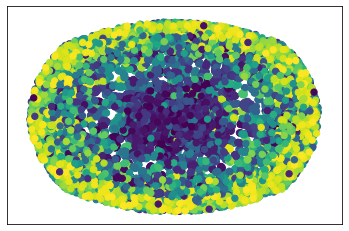

In [21]:
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(communities.values()) + 1)
nx.draw_networkx_nodes(G, pos, communities.keys(), node_size=40,
                       cmap=cmap, node_color=list(communities.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [29]:
df_Leisure = df_infection[df_infection['location_class']=='Leisure']
df_Workplace = df_infection[df_infection['location_class']=='Workplace']
df_School = df_infection[df_infection['location_class']=='School']
df_Household = df_infection[df_infection['location_class']=='Household']

In [30]:
df_Leisure

,run,tick,stat_district,location_id,location_class,infected_person,new_infected_person
0,18,1.0,74,3,Leisure,621,77367
1,18,1.0,0,55,Leisure,93973,39557
2,18,1.0,0,1,Leisure,83403,80545
7,18,1.0,0,47,Leisure,90645,30602
15,18,1.0,0,19,Leisure,73665,4342
...,...,...,...,...,...,...,...
112055,98,60.0,0,23,Leisure,16826,89691
112057,98,60.0,0,60,Leisure,9164,58249
112060,98,60.0,0,22,Leisure,26592,33490
112062,98,60.0,0,23,Leisure,23385,13788


In [31]:
df_Workplace

,run,tick,stat_district,location_id,location_class,infected_person,new_infected_person
3,18,1.0,0,87,Workplace,86176,66492
13,18,1.0,0,75,Workplace,10354,16780
21,18,1.0,0,35,Workplace,85024,64528
29,18,1.0,0,12,Workplace,72510,10516
33,18,2.0,0,47,Workplace,81031,46116
...,...,...,...,...,...,...,...
112056,98,60.0,0,41,Workplace,702,63896
112063,98,60.0,0,96,Workplace,3127,41428
112064,98,60.0,0,51,Workplace,9233,62802
112066,98,60.0,0,41,Workplace,702,27115


In [32]:
df_Household

,run,tick,stat_district,location_id,location_class,infected_person,new_infected_person
4,18,1.0,250,20444,Household,36120,36122
5,18,1.0,810,42695,Household,76706,76705
6,18,1.0,165,50201,Household,90645,90647
9,18,1.0,310,47558,Household,85411,85410
10,18,1.0,630,27317,Household,49279,49277
...,...,...,...,...,...,...,...
112054,98,60.0,1010,26423,Household,47558,47557
112058,98,60.0,1110,26626,Household,47971,47972
112059,98,60.0,375,38047,Household,68029,68030
112061,98,60.0,450,33532,Household,59956,59957


In [33]:
df_School

,run,tick,stat_district,location_id,location_class,infected_person,new_infected_person
8,18,1.0,0,13,School,66149,66958
31,18,2.0,0,3,School,85523,86524
46,18,2.0,0,2,School,71622,74063
49,18,2.0,0,1,School,43998,43043
151,18,12.0,0,3,School,86524,86477
...,...,...,...,...,...,...,...
111843,98,45.0,0,0,School,75000,3129
111854,98,46.0,2,11,School,15676,12571
111920,98,50.0,0,4,School,8551,8980
111949,98,52.0,4,18,School,27077,25834


In [34]:
graph_School = nx.from_pandas_edgelist(df_School, source='infected_person',target='new_infected_person')

In [35]:
len(graph_School.nodes)

3852

In [36]:
len(graph_School.edges)

2703

In [37]:
# Compute the average degree of the graph
avg_degree = sum(dict(graph_School.degree()).values())/len(graph_School)
# Iterate over the nodes in the graph
for node in list(graph_School.nodes()):
    # Compute the degree of the current node
    degree = graph_School.degree(node)
    
    # Check if the degree is significantly higher or lower than the average degree
    if degree > avg_degree*1.5 or degree < avg_degree*0.5:
        # Remove the node from the graph
        graph_School.remove_node(node)

In [38]:
len(graph_School.nodes)

3165

In [39]:
len(graph_School.edges)

1822

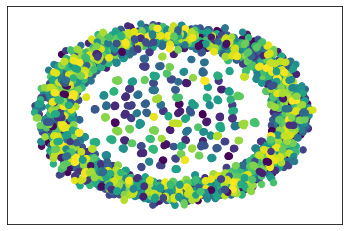

In [40]:
communities_School = community_louvain.best_partition(graph_School)
pos = nx.spring_layout(graph_School)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(communities_School.values()) + 1)
nx.draw_networkx_nodes(graph_School, pos, communities_School.keys(), node_size=40,
                       cmap=cmap, node_color=list(communities_School.values()))
nx.draw_networkx_edges(graph_School, pos, alpha=0.5)
plt.show()

In [41]:
graph_Leisure = nx.from_pandas_edgelist(df_Leisure, source='infected_person',target='new_infected_person')
graph_household = nx.from_pandas_edgelist(df_Household, source='infected_person',target='new_infected_person')
graph_Workplace = nx.from_pandas_edgelist(df_Workplace,source = 'infected_person',target = 'new_infected_person')

In [42]:
print(len(graph_household.nodes))
print(len(graph_household.edges))
print(len(graph_Leisure.nodes))
print(len(graph_Leisure.edges))
print(len(graph_Workplace.nodes))
print(len(graph_Workplace.edges))

38710
30220
49297
52409
21300
18072


In [43]:
# Compute the average degree of the graph
avg_degree = sum(dict(graph_household.degree()).values())/len(graph_household)
# Iterate over the nodes in the graph
for node in list(graph_household.nodes()):
    # Compute the degree of the current node
    degree = graph_household.degree(node)
    
    # Check if the degree is significantly higher or lower than the average degree
    if degree > avg_degree*1.5 or degree < avg_degree*0.5:
        # Remove the node from the graph
        graph_household.remove_node(node)

In [44]:
print(len(graph_household.nodes))
print(len(graph_household.edges))

33559
20517


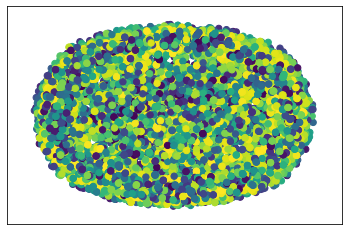

In [149]:
communities_household = community_louvain.best_partition(graph_household)
pos = nx.spring_layout(graph_household)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(communities_household.values()) + 1)
nx.draw_networkx_nodes(graph_household, pos, communities_household.keys(), node_size=40,
                       cmap=cmap, node_color=list(communities_household.values()))
nx.draw_networkx_edges(graph_household, pos, alpha=0.5)
plt.show()

In [45]:
# Compute the average degree of the graph
avg_degree = sum(dict(graph_Workplace.degree()).values())/len(graph_Workplace)
# Iterate over the nodes in the graph
for node in list(graph_Workplace.nodes()):
    # Compute the degree of the current node
    degree = graph_Workplace.degree(node)
    
    # Check if the degree is significantly higher or lower than the average degree
    if degree > avg_degree*1.5 or degree < avg_degree*0.5:
        # Remove the node from the graph
        graph_Workplace.remove_node(node)

In [46]:
print(len(graph_Workplace.nodes))
print(len(graph_Workplace.edges))

12611
7160


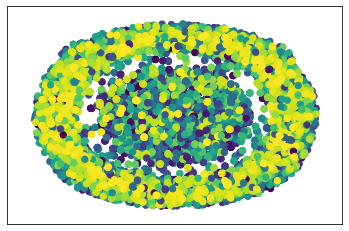

In [152]:
communities_workplace = community_louvain.best_partition(graph_Workplace)
pos = nx.spring_layout(graph_Workplace)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(communities_workplace.values()) + 1)
nx.draw_networkx_nodes(graph_household, pos, communities_workplace.keys(), node_size=40,
                       cmap=cmap, node_color=list(communities_workplace.values()))
nx.draw_networkx_edges(graph_Workplace, pos, alpha=0.5)
plt.show()

In [47]:
# Compute the average degree of the graph
avg_degree = sum(dict(graph_Leisure.degree()).values())/len(graph_Leisure)
# Iterate over the nodes in the graph
for node in list(graph_Leisure.nodes()):
    # Compute the degree of the current node
    degree = graph_Leisure.degree(node)
    
    # Check if the degree is significantly higher or lower than the average degree
    if degree > avg_degree*1.5 or degree < avg_degree*0.5:
        # Remove the node from the graph
        graph_Leisure.remove_node(node)

In [48]:
print(len(graph_Leisure.nodes))
print(len(graph_Leisure.edges))

10634
5940


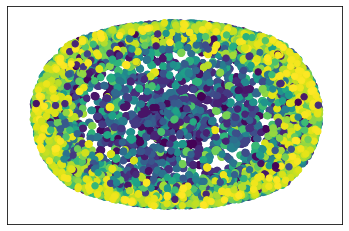

In [155]:
communities_Leisure = community_louvain.best_partition(graph_Leisure)
pos = nx.spring_layout(graph_Leisure)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(communities_Leisure.values()) + 1)
nx.draw_networkx_nodes(graph_household, pos, communities_Leisure.keys(), node_size=40,
                       cmap=cmap, node_color=list(communities_Leisure.values()))
nx.draw_networkx_edges(graph_Leisure, pos, alpha=0.5)
plt.show()